<a href="https://colab.research.google.com/github/Yan4S/DataAnalysis/blob/main/House.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://github.com/Yan4S/DataAnalysis.git

Cloning into 'DataAnalysis'...
remote: Enumerating objects: 237, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 237 (delta 33), reused 0 (delta 0), pack-reused 167 (from 1)
Receiving objects: 100% (237/237), 3.69 MiB | 17.09 MiB/s, done.
Resolving deltas: 100% (110/110), done.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Dict, Optional
import logging


folderPath = 'DataAnalysis/Kaggle/'

## Step 1: EDA

#### (1-1) Load Data \& Plot Y (skewed)

In [5]:
raw_train = pd.read_csv(folderPath+'house_train.csv')
raw_X_test = pd.read_csv(folderPath+'house_test.csv')
raw_X_train = raw_train.drop('SalePrice', axis=1)
raw_y_train = raw_train['SalePrice']

In [6]:
num_feas = raw_X_train.select_dtypes(include=np.number).columns
cat_feas = raw_X_train.select_dtypes(exclude=np.number).columns

print(f'Numerical Features ({len(num_feas)}):\n {num_feas}')
print(f'Categorical Features ({len(cat_feas)}):\n {cat_feas}')

raw_X_train.describe()

Numerical Features (37):
 Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')
Categorical Features (43):
 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinTy

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


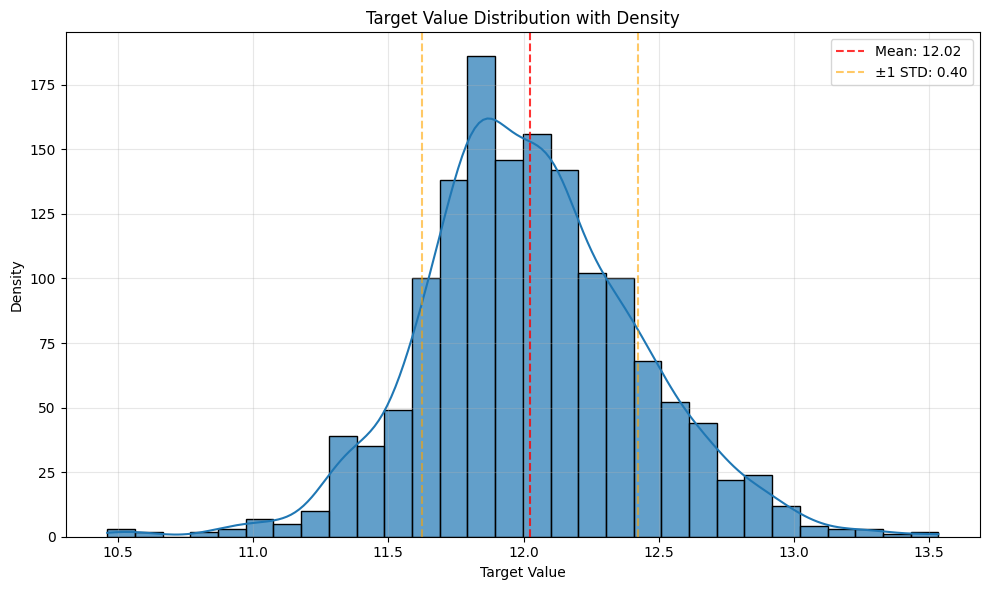

In [12]:
def plot_target_distribution(y: pd.Series, problem_type: str = 'classification',
                           figsize: tuple = (10, 6), filename: Optional[str] = None) -> None:
    """
    Plot distribution of target variable with density line.

    Args:
        y: Target series
        problem_type: 'classification' or 'regression'
        figsize: Figure size
        filename: Optional filename to save plot
    """
    plt.figure(figsize=figsize)

    if problem_type == 'classification':
        value_counts = y.value_counts().sort_index()
        bars = plt.bar(range(len(value_counts)), value_counts.values)
        plt.xticks(range(len(value_counts)), value_counts.index)
        plt.xlabel('Class')
        plt.ylabel('Count')
        plt.title('Target Class Distribution')

        # Add counts on bars
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height)}', ha='center', va='bottom')
    else:
        # Histogram with density line
        sns.histplot(y, bins=30, kde=True, alpha=0.7, edgecolor='black')
        plt.xlabel('Target Value')
        plt.ylabel('Density')
        plt.title('Target Value Distribution with Density')

        # Add statistics
        mean_val = y.mean()
        std_val = y.std()
        plt.axvline(mean_val, color='red', linestyle='--', alpha=0.8,
                   label=f'Mean: {mean_val:.2f}')
        plt.axvline(mean_val + std_val, color='orange', linestyle='--', alpha=0.6,
                   label=f'±1 STD: {std_val:.2f}')
        plt.axvline(mean_val - std_val, color='orange', linestyle='--', alpha=0.6)
        plt.legend()

    plt.grid(True, alpha=0.3)
    plt.tight_layout()

    if filename:
        plt.savefig(filename, dpi=300, bbox_inches='tight')

    plt.show()

# Usage
plot_target_distribution(np.log(raw_y_train), 'regression')

In [55]:
# raw_X_train.info()

#### (1-2) Missing Data
* Choose dropna threshold later

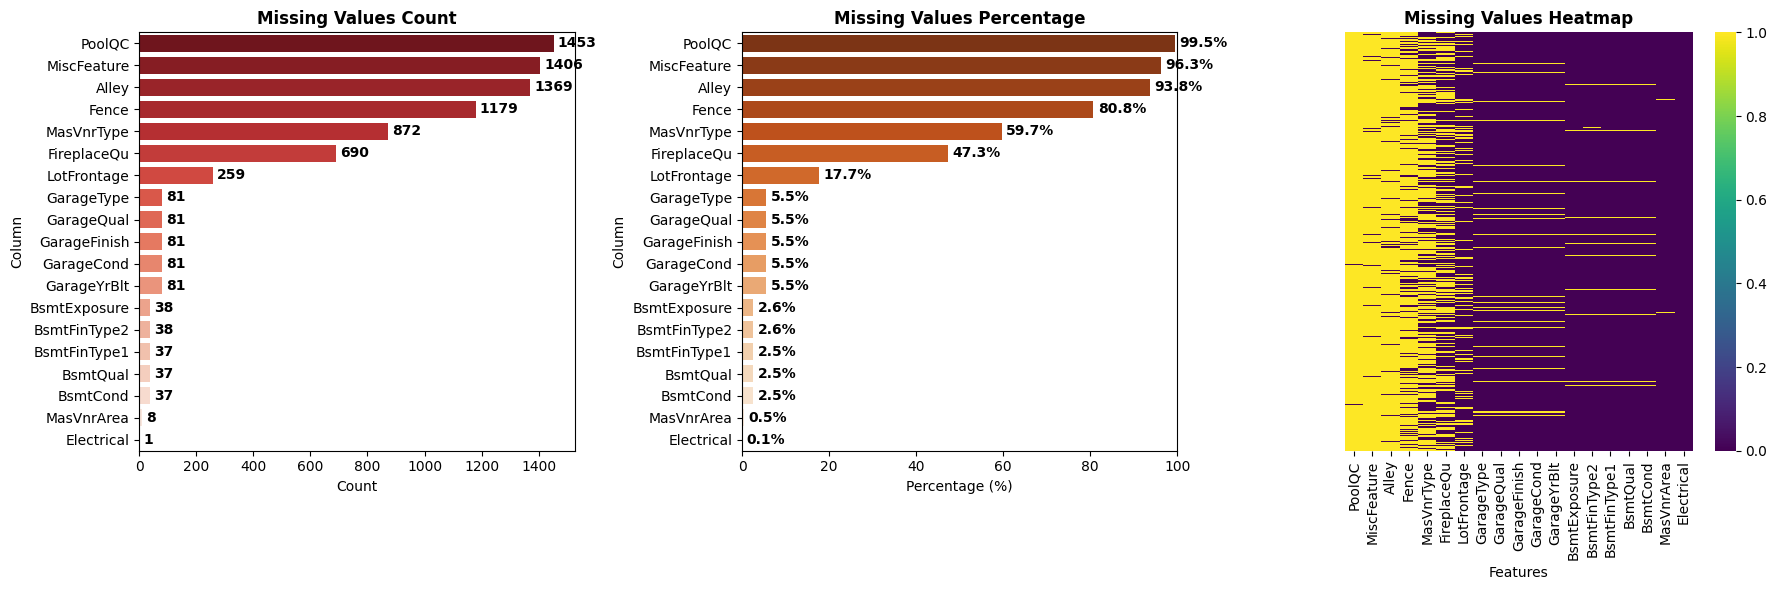

In [17]:
def plot_missing_values(X: pd.DataFrame, col_names: Optional[List[str]] = None,
                       figsize: tuple = (18, 6)) -> None:
    """
    Plot missing values with bar charts and heatmap using seaborn.
    """
    if col_names is None:
        data_to_plot = X
    else:
        data_to_plot = X[col_names]

    missing_count = data_to_plot.isnull().sum()
    missing_pct = (missing_count / len(data_to_plot)) * 100
    missing_data = pd.DataFrame({
        'Column': missing_count.index,
        'Missing_Count': missing_count.values,
        'Missing_Percent': missing_pct.values
    }).sort_values('Missing_Percent', ascending=False)
    missing_data = missing_data[missing_data['Missing_Count'] > 0]

    if missing_data.empty:
        logging.info("No missing values found")
        return

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=figsize)

    # Count plot with seaborn
    sns.barplot(data=missing_data, y='Column', x='Missing_Count', hue='Column',
                palette='Reds_r', ax=ax1, legend=False)
    ax1.set_title('Missing Values Count', fontweight='bold')
    ax1.set_xlabel('Count')

    # Add numbers on count bars
    for i, (_, row) in enumerate(missing_data.iterrows()):
        ax1.text(row['Missing_Count'] + (max(missing_data['Missing_Count']) * 0.01),
                i, f'{int(row["Missing_Count"])}',
                ha='left', va='center', fontweight='bold')

    # Percentage plot with seaborn
    sns.barplot(data=missing_data, y='Column', x='Missing_Percent', hue='Column',
                palette='Oranges_r', ax=ax2, legend=False)
    ax2.set_title('Missing Values Percentage', fontweight='bold')
    ax2.set_xlabel('Percentage (%)')
    ax2.set_xlim(0, 100)

    # Add numbers on percentage bars
    for i, (_, row) in enumerate(missing_data.iterrows()):
        ax2.text(row['Missing_Percent'] + 1, i, f'{row["Missing_Percent"]:.1f}%',
                ha='left', va='center', fontweight='bold')

    # Missing values heatmap
    missing_matrix = data_to_plot[missing_data['Column']].isnull()
    sns.heatmap(missing_matrix, cbar=True, yticklabels=False, cmap='viridis', ax=ax3)
    ax3.set_title('Missing Values Heatmap', fontweight='bold')
    ax3.set_xlabel('Features')

    plt.tight_layout()
    plt.show()

plot_missing_values(raw_X_train)

#### (1-3-A) Plot Numerical Data

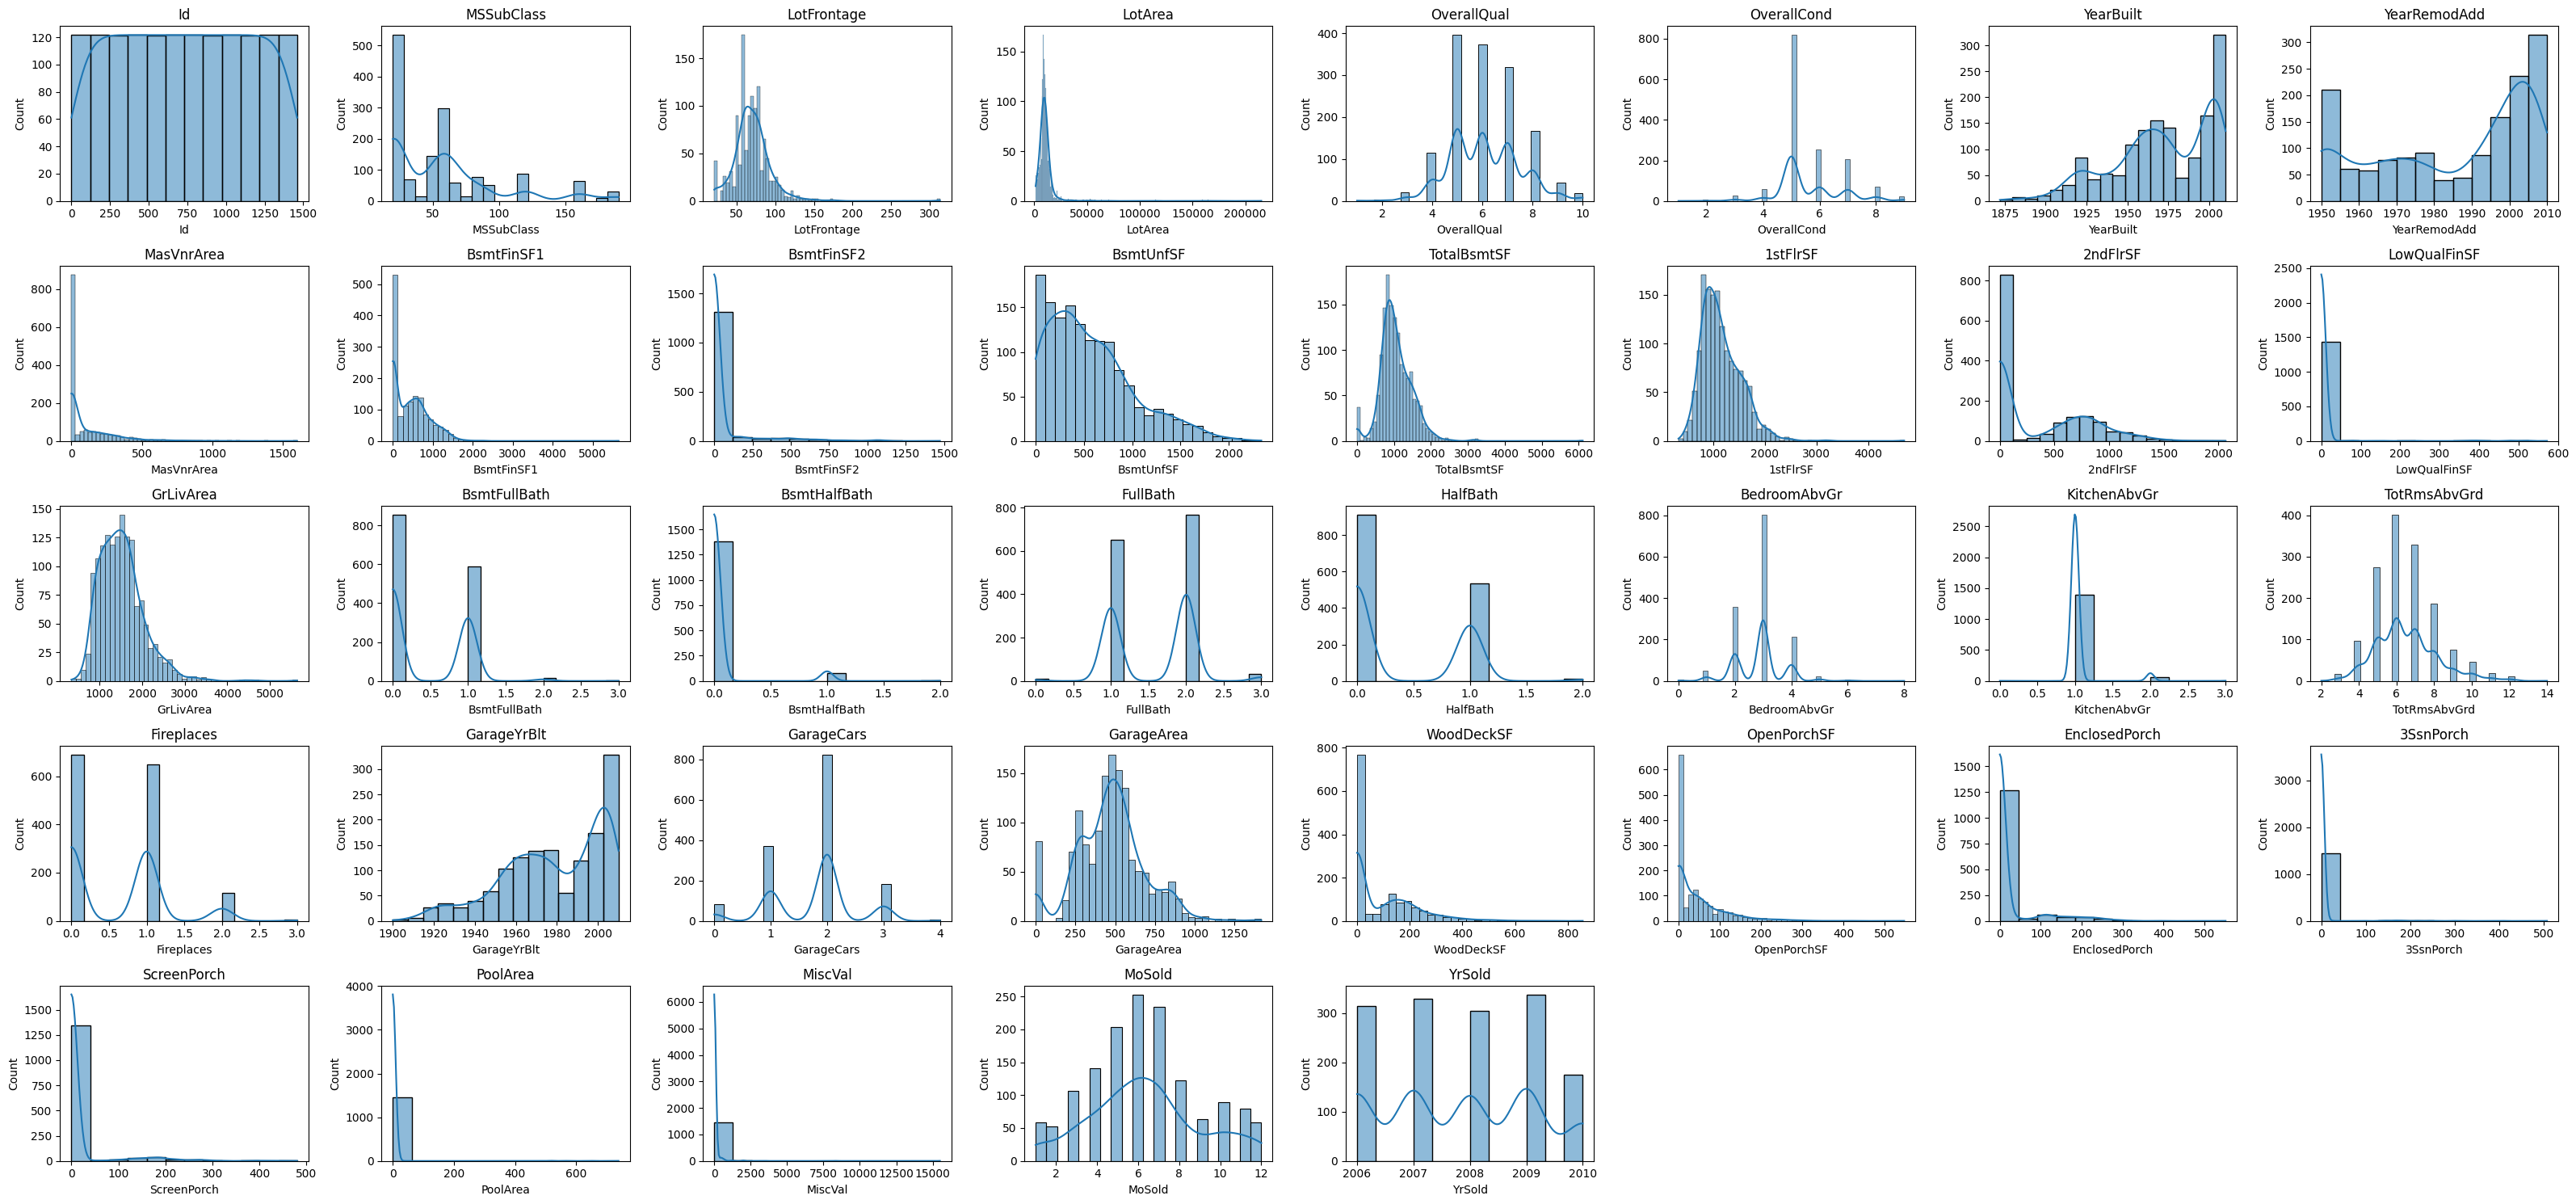

In [14]:
def plot_numeric_features(X: pd.DataFrame, plot_type: str = 'histogram', ncols: int = 8, col_names: Optional[List[str]] = None):
    """Plot numeric features with specified type"""

    if col_names is None:
        numeric_cols = X.select_dtypes(include=['number']).columns.tolist()
    else:
        numeric_cols = [col for col in col_names if col in X.columns and pd.api.types.is_numeric_dtype(X[col])]

    if not numeric_cols:
        logging.info("No numeric columns found")
        return

    n_features = len(numeric_cols)
    nrows = (n_features + ncols - 1) // ncols

    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 4, nrows * 3))
    axes_flat = axes.flatten() if nrows * ncols > 1 else [axes]

    for i, col in enumerate(numeric_cols):
        if i < len(axes_flat):
            ax = axes_flat[i]

            if plot_type == 'histogram':
                sns.histplot(data=X, x=col, ax=ax, kde=True)
                ax.set_title(f'{col}')
            elif plot_type == 'boxplot':
                sns.boxplot(data=X, y=col, ax=ax)
                ax.set_title(f'{col}')
            elif plot_type == 'density':
                sns.kdeplot(data=X, x=col, ax=ax, fill=True)
                ax.set_title(f'{col}')
            elif plot_type == 'violin':
                sns.violinplot(data=X, y=col, ax=ax)
                ax.set_title(f'{col}')

    # Hide empty subplots
    for i in range(len(numeric_cols), len(axes_flat)):
        axes_flat[i].set_visible(False)

    plt.tight_layout()
    plt.show()

plot_numeric_features(raw_X_train, 'histogram', 8)

#### (1-3-B) Plot Categorical Data

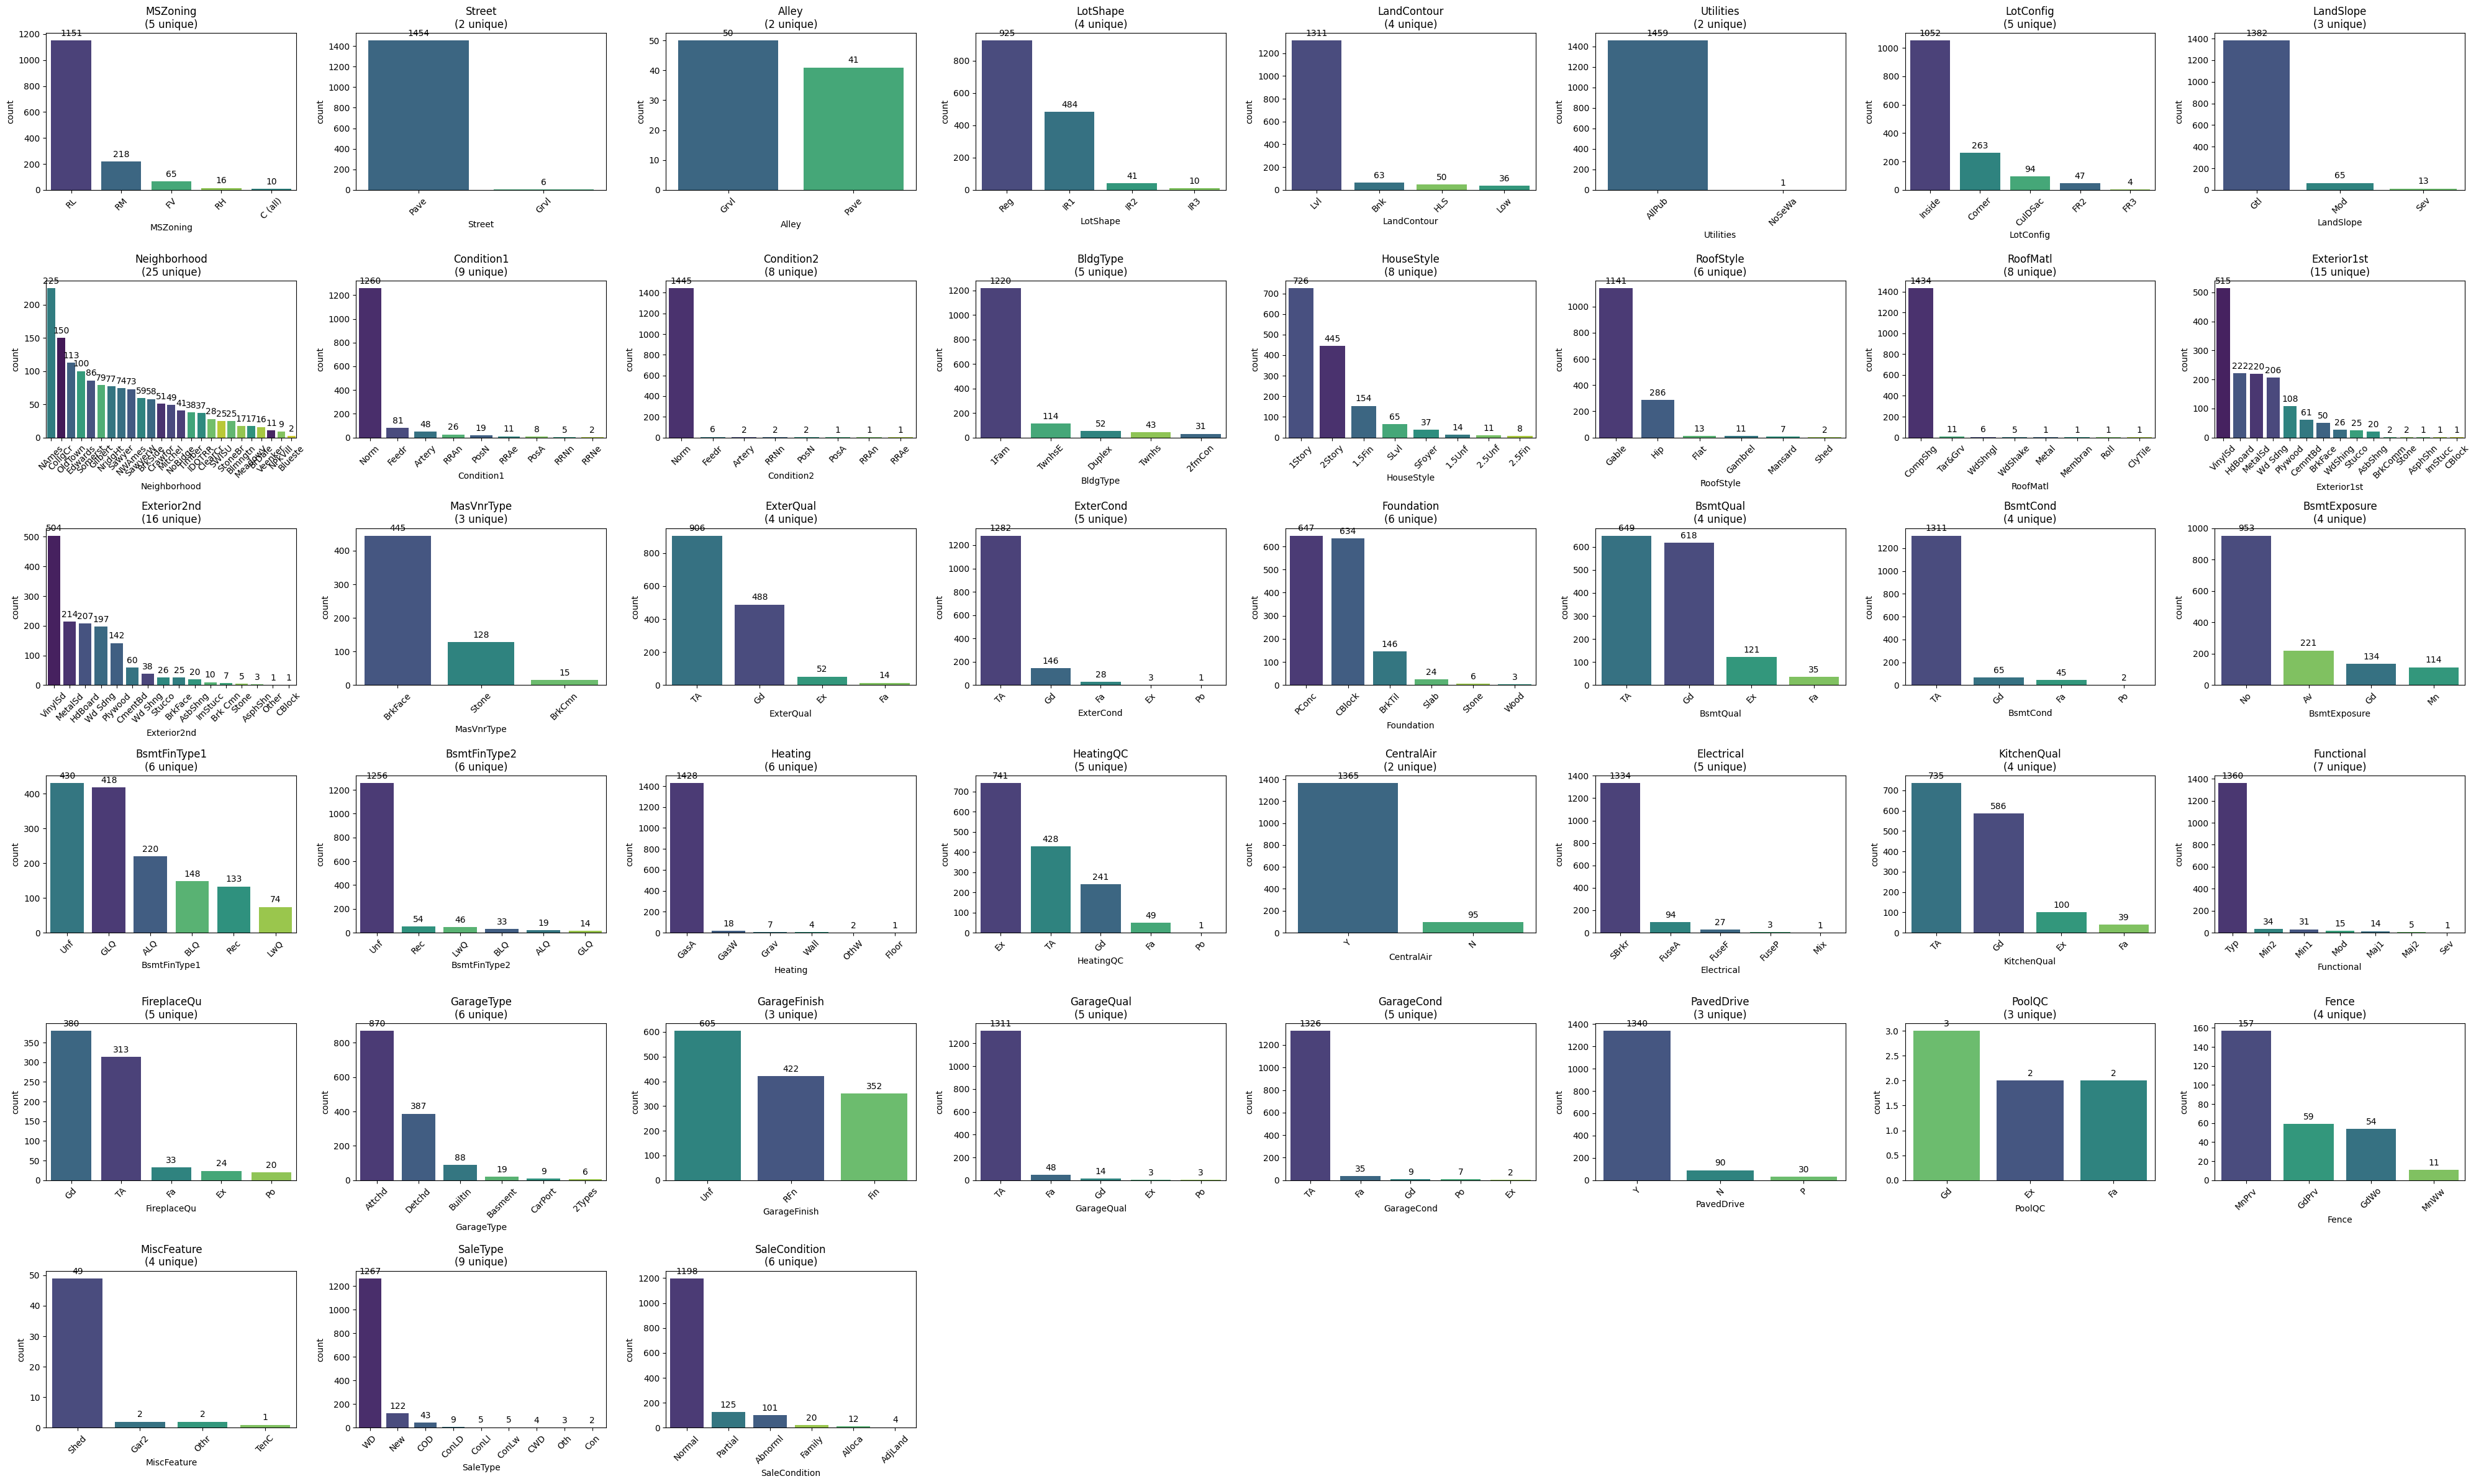

In [67]:
def plot_categorical_features(X: pd.DataFrame, max_categories: int = 10, ncols: int = 8, col_names: Optional[List[str]] = None):
    """Plot categorical features using Seaborn"""

    if col_names is None:
        categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
    else:
        categorical_cols = [col for col in col_names if col in X.columns and X[col].dtype in ['object', 'category']]

    if not categorical_cols:
        logging.info("No categorical columns found")
        return

    n_features = len(categorical_cols)
    nrows = (n_features + ncols - 1) // ncols

    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 5, nrows * 4))
    axes_flat = axes.flatten() if nrows * ncols > 1 else [axes]

    for i, col in enumerate(categorical_cols):
        if i < len(axes_flat):
            ax = axes_flat[i]
            value_counts = X[col].value_counts().head(max_categories)

            # Seaborn countplot
            sns.countplot(data=X, x=col, ax=ax, order=value_counts.index,hue=col, palette='viridis', legend=False)

            ax.set_title(f'{col}\n({X[col].nunique()} unique)')
            ax.tick_params(axis='x', rotation=45)

            # Add value labels on bars
            for container in ax.containers:
                ax.bar_label(container, fmt='%d', padding=3)

    # Hide empty subplots
    for i in range(len(categorical_cols), len(axes_flat)):
        axes_flat[i].set_visible(False)

    plt.tight_layout()
    plt.show()
plot_categorical_features(raw_X_train, max_categories=len(cat_feas))

#### (1-4-A) From Num & Y: Corr(Xi, Y) -- (top features)

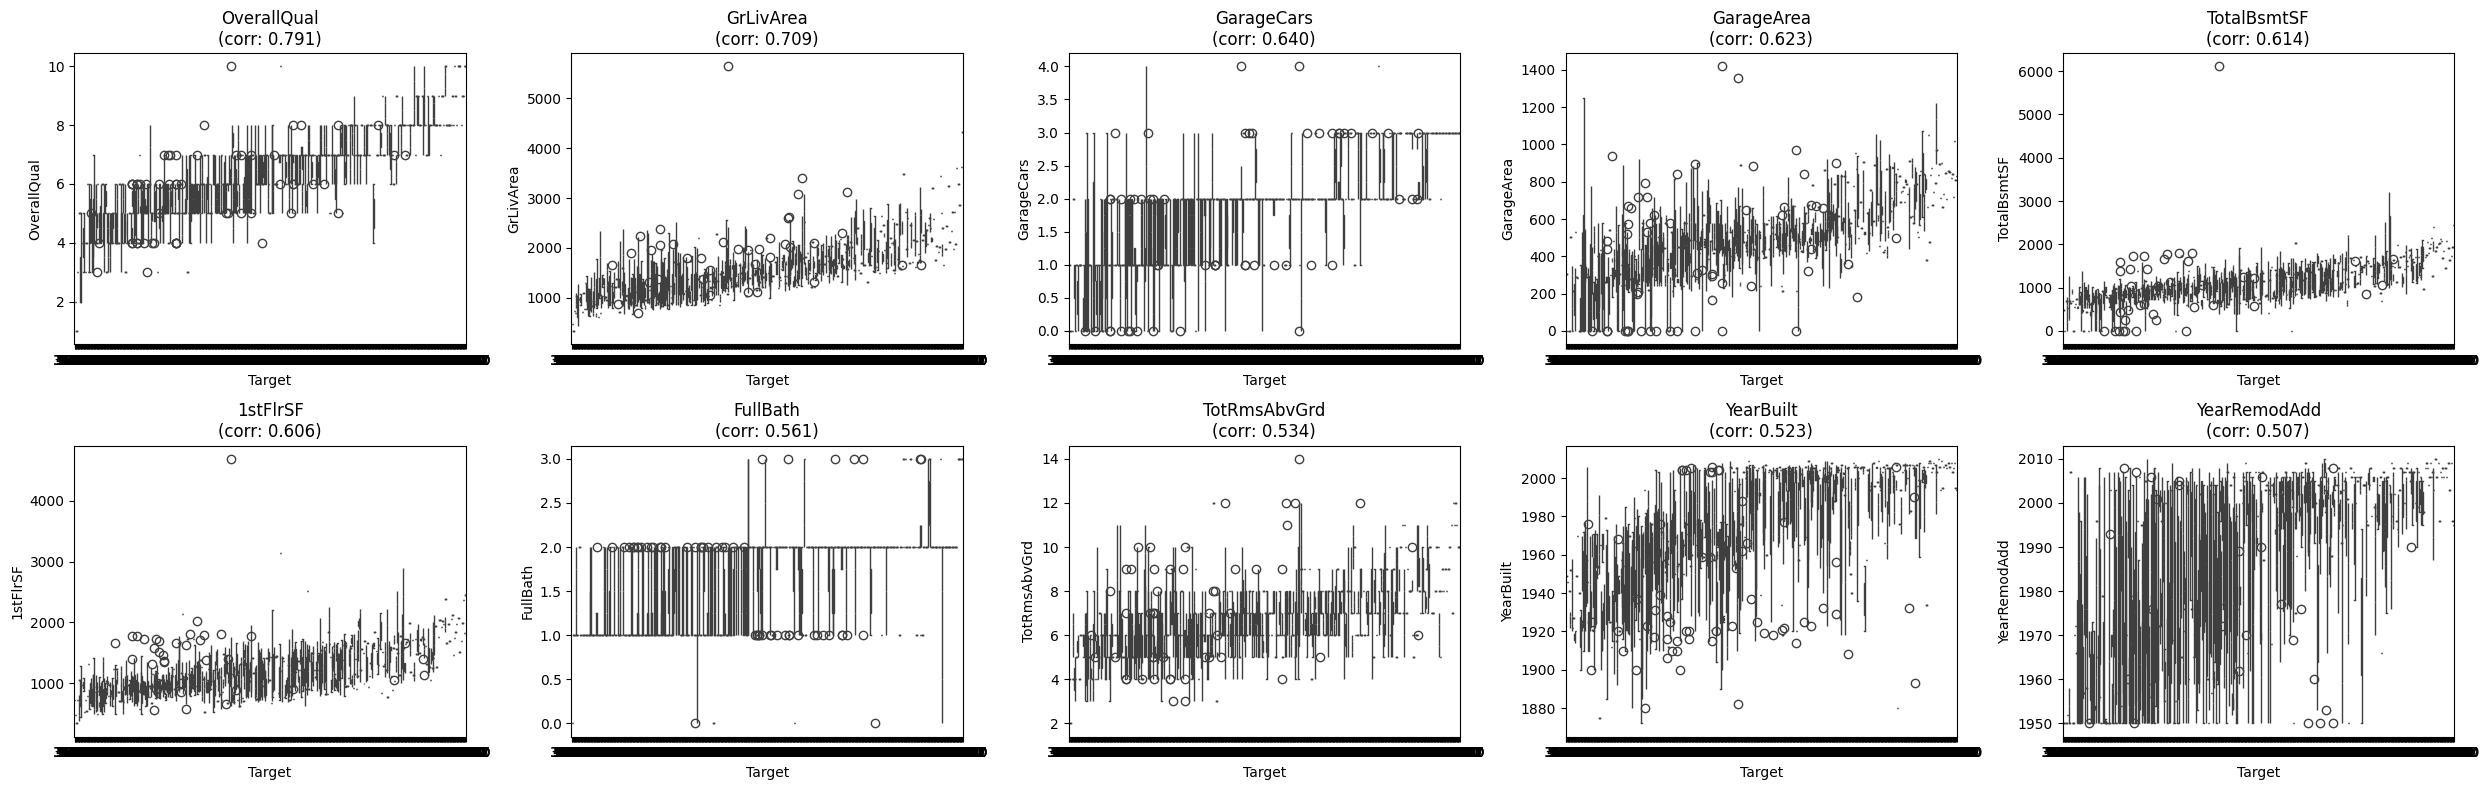

In [18]:
def plot_target_relationships(X: pd.DataFrame, y: pd.Series, n_features: int = 10, plot_type: str = 'scatter', col_names: Optional[List[str]] = None):
    """Plot relationships between features and target"""

    if col_names is None:
        numeric_cols = X.select_dtypes(include=['number']).columns.tolist()
    else:
        numeric_cols = [col for col in col_names if col in X.columns and pd.api.types.is_numeric_dtype(X[col])]

    if not numeric_cols:
        logging.info("No numeric columns found")
        return

    # Select top correlated features with target
    correlations = X[numeric_cols].corrwith(y).abs().sort_values(ascending=False)
    top_features = correlations.head(n_features).index.tolist()

    ncols = 5
    nrows = (len(top_features) + ncols - 1) // ncols

    fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))
    axes_flat = axes.flatten() if nrows * ncols > 1 else [axes]

    for i, col in enumerate(top_features):
        if i < len(axes_flat):
            ax = axes_flat[i]
            plot_data = pd.DataFrame({col: X[col], 'Target': y})

            if plot_type == 'scatter':
                ax.scatter(X[col], y, alpha=0.5, s=20)
                ax.set_xlabel(col)
                ax.set_ylabel('Target')

            elif plot_type == 'boxplot':
                sns.boxplot(data=plot_data, x='Target', y=col, ax=ax)

            elif plot_type == 'violinplot':
                sns.violinplot(data=plot_data, x='Target', y=col, ax=ax)

            elif plot_type == 'stripplot':
                sns.stripplot(data=plot_data, x='Target', y=col, ax=ax, alpha=0.5, jitter=True)

            # elif plot_type == 'swarmplot':
            #     sns.swarmplot(data=plot_data, x='Target', y=col, ax=ax, alpha=0.7)

            else:
                logging.warning(f"Unknown plot type: {plot_type}. Using scatter plot.")
                ax.scatter(X[col], y, alpha=0.5, s=20)
                ax.set_xlabel(col)
                ax.set_ylabel('Target')

            corr = correlations[col]
            ax.set_title(f'{col}\n(corr: {corr:.3f})')

    # Hide empty subplots
    for i in range(len(top_features), len(axes_flat)):
        axes_flat[i].set_visible(False)

    plt.tight_layout()
    plt.show()

plot_target_relationships(raw_X_train, y=raw_y_train, n_features=10, plot_type='boxplot')

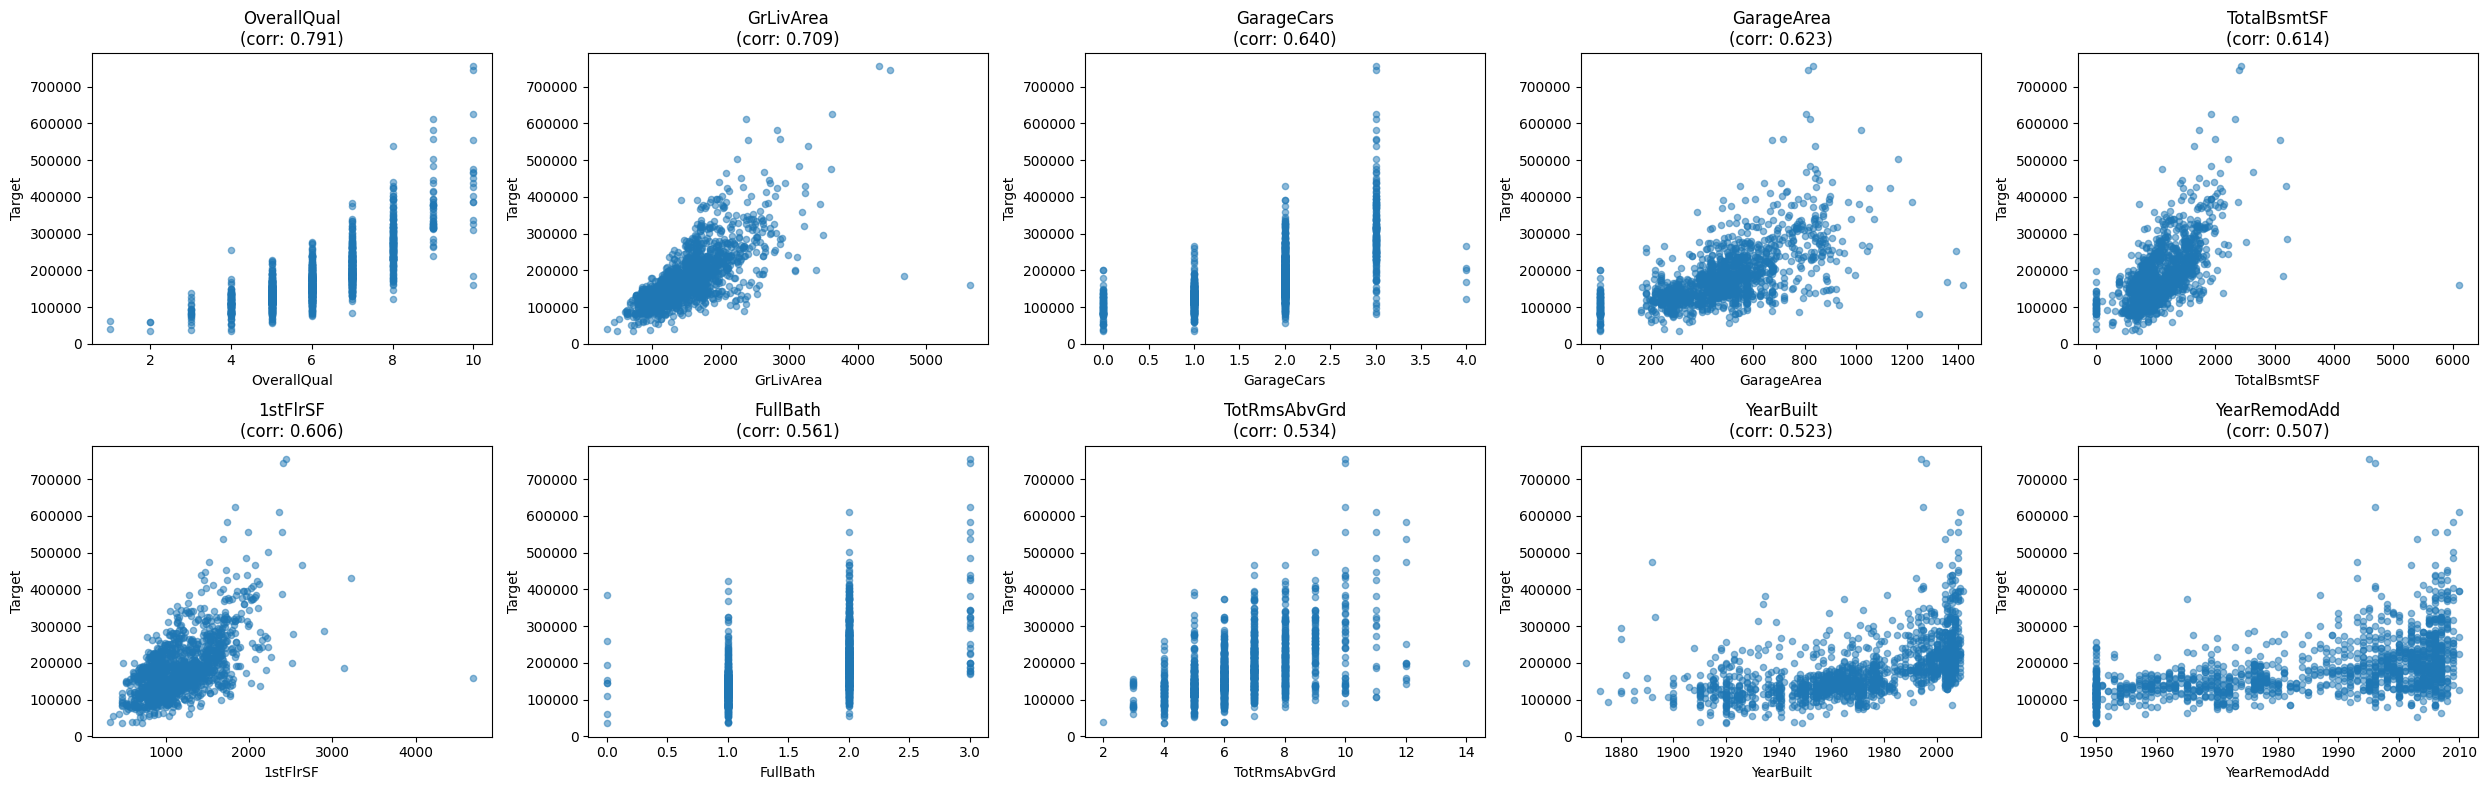

In [19]:
plot_target_relationships(raw_X_train, y=raw_y_train, n_features=10, plot_type='scatter')

#### (1-4-B) From Num \& Y: Heat Map (colinearity check)

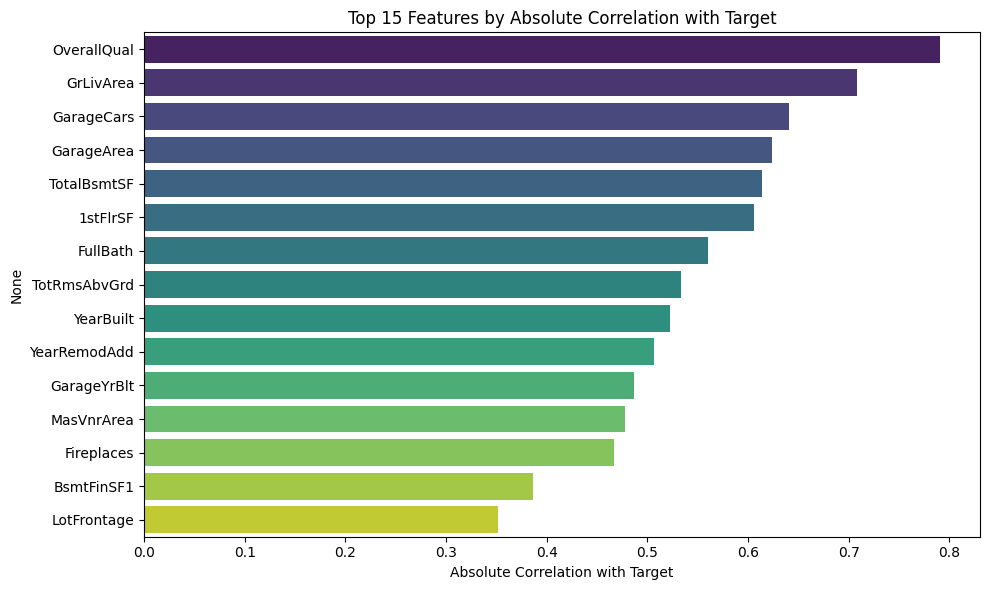

Top features by target correlation:
 1. OverallQual: 0.791
 2. GrLivArea: 0.709
 3. GarageCars: 0.640
 4. GarageArea: 0.623
 5. TotalBsmtSF: 0.614
 6. 1stFlrSF: 0.606
 7. FullBath: 0.561
 8. TotRmsAbvGrd: 0.534
 9. YearBuilt: 0.523
10. YearRemodAdd: 0.507
11. GarageYrBlt: 0.486
12. MasVnrArea: 0.477
13. Fireplaces: 0.467
14. BsmtFinSF1: 0.386
15. LotFrontage: 0.352



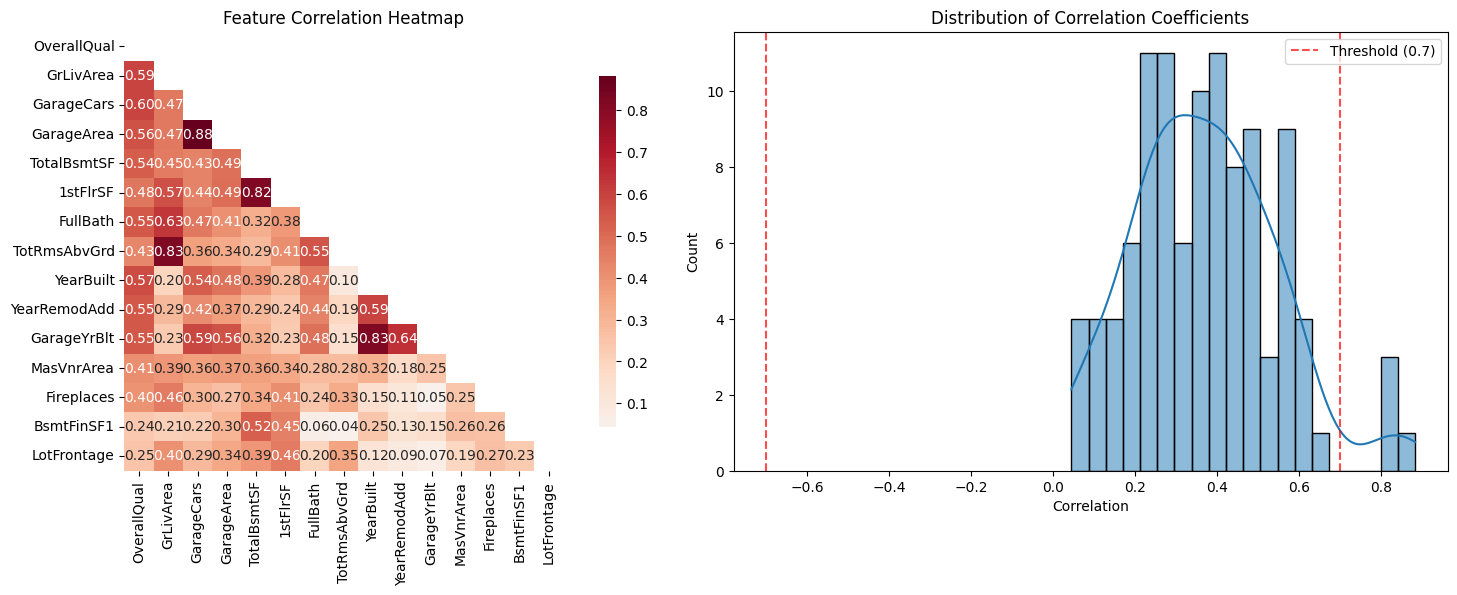

   Feature 1   Feature 2 Correlation
  GarageArea  GarageCars       0.882
    1stFlrSF TotalBsmtSF       0.820
TotRmsAbvGrd   GrLivArea       0.825
 GarageYrBlt   YearBuilt       0.826

Total pairs with correlation > 0.7: 4

Suggested actions for high correlations:
- Consider removing one of: GarageArea vs GarageCars (r=0.882)
- Consider removing one of: 1stFlrSF vs TotalBsmtSF (r=0.820)
- Consider removing one of: TotRmsAbvGrd vs GrLivArea (r=0.825)
- Consider removing one of: GarageYrBlt vs YearBuilt (r=0.826)


In [20]:
def plot_correlation_analysis(X: pd.DataFrame, y: pd.Series = None, n_features: int = 20,
                            threshold: float = 0.8, figsize: tuple = (16, 6),
                            show_target_correlations: bool = True):
    """
    Comprehensive correlation analysis with heatmap and collinearity detection

    Parameters:
    - X: Feature dataframe
    - y: Target series (optional)
    - n_features: Number of top features to include
    - threshold: Correlation threshold for identifying collinear pairs
    - figsize: Figure size
    - show_target_correlations: Whether to show correlation with target
    """

    # Select numeric columns
    numeric_cols = X.select_dtypes(include=['number']).columns.tolist()

    if not numeric_cols:
        logging.info("No numeric columns found")
        return

    # Get selected features based on target correlation
    if y is not None:
        correlations_with_y = X[numeric_cols].corrwith(y).abs().sort_values(ascending=False)
        selected_features = correlations_with_y.head(n_features).index.tolist()

        if show_target_correlations:
            # Plot target correlations
            plt.figure(figsize=(10, 6))
            target_corrs = correlations_with_y.head(n_features)

            sns.barplot(x=target_corrs.values, y=target_corrs.index, hue=target_corrs.index, legend=False,palette='viridis')
            plt.title(f'Top {n_features} Features by Absolute Correlation with Target')
            plt.xlabel('Absolute Correlation with Target')
            plt.tight_layout()
            plt.show()

            print("Top features by target correlation:")
            for i, (feature, corr) in enumerate(target_corrs.items(), 1):
                print(f"{i:2d}. {feature}: {corr:.3f}")
            print()
    else:
        selected_features = numeric_cols[:n_features]

    # Calculate correlation matrix
    corr_matrix = X[selected_features].corr()

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)

    # Plot 1: Correlation heatmap
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='RdBu_r',
                center=0, square=True, cbar_kws={"shrink": .8}, ax=ax1)
    ax1.set_title('Feature Correlation Heatmap')

    # Plot 2: Correlation distribution
    corr_values = corr_matrix.where(np.triu(np.ones_like(corr_matrix, dtype=bool), k=1))
    corr_values = corr_values.stack().reset_index()
    corr_values.columns = ['Feature1', 'Feature2', 'Correlation']
    corr_values = corr_values[corr_values['Feature1'] != corr_values['Feature2']]

    sns.histplot(data=corr_values, x='Correlation', ax=ax2, bins=20, kde=True)
    ax2.axvline(threshold, color='red', linestyle='--', alpha=0.7, label=f'Threshold ({threshold})')
    ax2.axvline(-threshold, color='red', linestyle='--', alpha=0.7)
    ax2.set_title('Distribution of Correlation Coefficients')
    ax2.legend()

    plt.tight_layout()
    plt.show()

    # Show high correlations
    corr_upper = corr_matrix.where(np.triu(np.ones_like(corr_matrix, dtype=bool), k=1))

    high_corr_pairs = []
    for col in corr_upper.columns:
        high_corrs = corr_upper[col][abs(corr_upper[col]) > threshold]
        for feature, corr in high_corrs.items():
            high_corr_pairs.append({
                'Feature 1': col,
                'Feature 2': feature,
                'Correlation': f'{corr:.3f}'
            })

    if high_corr_pairs:
        logging.info(f"High correlations (> {threshold}):")
        high_corr_df = pd.DataFrame(high_corr_pairs)
        print(high_corr_df.to_string(index=False))
        print(f"\nTotal pairs with correlation > {threshold}: {len(high_corr_pairs)}")

        # Show top suggestions
        print("\nSuggested actions for high correlations:")
        for pair in high_corr_pairs[:5]:
            print(f"- Consider removing one of: {pair['Feature 1']} vs {pair['Feature 2']} (r={pair['Correlation']})")
    else:
        logging.info(f"No correlations above {threshold} found")

    return corr_matrix


corr_matrix = plot_correlation_analysis(raw_X_train, y=raw_y_train, n_features=15, threshold=0.7)

#### (1-5) Categorical \& Y

## (Step 2) Data Preprocessing

In [41]:
drop_missing_thres = 0.2
